In [5]:
import keras
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [15]:
#setting the dimensions
img_width, img_height = 288, 432

#directories with the data
train_data_dir = "./spec_data/train"
val_data_dir = "./spec_data/val"


#some model params
num_val_data = 95
num_train_data = 373
epochs = 10
batch_size = 32

#input shape for the model layer 0
input_shape = (img_width, img_height, 3)

In [16]:
datagen = ImageDataGenerator(
                             shear_range = 0.2, 
                             zoom_range = 0.1, 
                             horizontal_flip=False, 
                             fill_mode = 'nearest')

In [17]:
#Here it is as channel_last so we have W x H x RGB
K.image_data_format()

'channels_last'

In [18]:
#ConvNet
#input layer
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#first hidden layer 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#second hidden layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#output layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 286, 430, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 286, 430, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 143, 215, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 141, 213, 32)      9248      
_________________________________________________________________
activation_6 (Activation)    (None, 141, 213, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 70, 106, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 68, 104, 64)      

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
#Setting the generators 
train_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.05, horizontal_flip=False)

test_gen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_gen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_gen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 373 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [23]:
model_conv = model.fit(train_generator,
                        steps_per_epoch=num_train_data // batch_size,
                        epochs=epochs,
                        validation_data=validation_generator,
                        validation_steps=num_val_data // batch_size)

Epoch 1/10
11/11 [==============================] - 50s 4s/step - loss: 0.8368 - accuracy: 0.8065 - val_loss: 0.2462 - val_accuracy: 0.9375
Epoch 2/10
11/11 [==============================] - 43s 4s/step - loss: 0.3243 - accuracy: 0.9267 - val_loss: 0.3478 - val_accuracy: 0.8750
Epoch 3/10
11/11 [==============================] - 42s 4s/step - loss: 0.3324 - accuracy: 0.9267 - val_loss: 0.2767 - val_accuracy: 0.9062
Epoch 4/10
11/11 [==============================] - 42s 4s/step - loss: 0.2616 - accuracy: 0.9238 - val_loss: 0.4217 - val_accuracy: 0.9219
Epoch 5/10
11/11 [==============================] - 43s 4s/step - loss: 0.2997 - accuracy: 0.9179 - val_loss: 0.2002 - val_accuracy: 0.9375
Epoch 6/10
11/11 [==============================] - 41s 4s/step - loss: 0.3224 - accuracy: 0.9150 - val_loss: 0.3237 - val_accuracy: 0.8750
Epoch 7/10
11/11 [==============================] - 41s 4s/step - loss: 0.2367 - accuracy: 0.9238 - val_loss: 0.3265 - val_accuracy: 0.8906
Epoch 8/10
11/11 [==

In [27]:
def plot_metrics(model_conv):
    range_list = list(range(epochs))
    for idx, m in enumerate(model_conv.history.keys()):
        plt.figure(figsize=(20,5), dpi=180)
        plt.plot(range_list, model_conv.history[m])
        plt.title(f"{m.upper()} for {epochs} Epochs using convnet")
        plt.xlabel("Epochs")
        plt.ylabel(f"{m.upper()}")
        plt.savefig(f"./img/Fig{idx+7}_{m.upper()}_ConvNet")

FileNotFoundError: [Errno 2] No such file or directory: '/img/Fig7_LOSS_ConvNet.png'

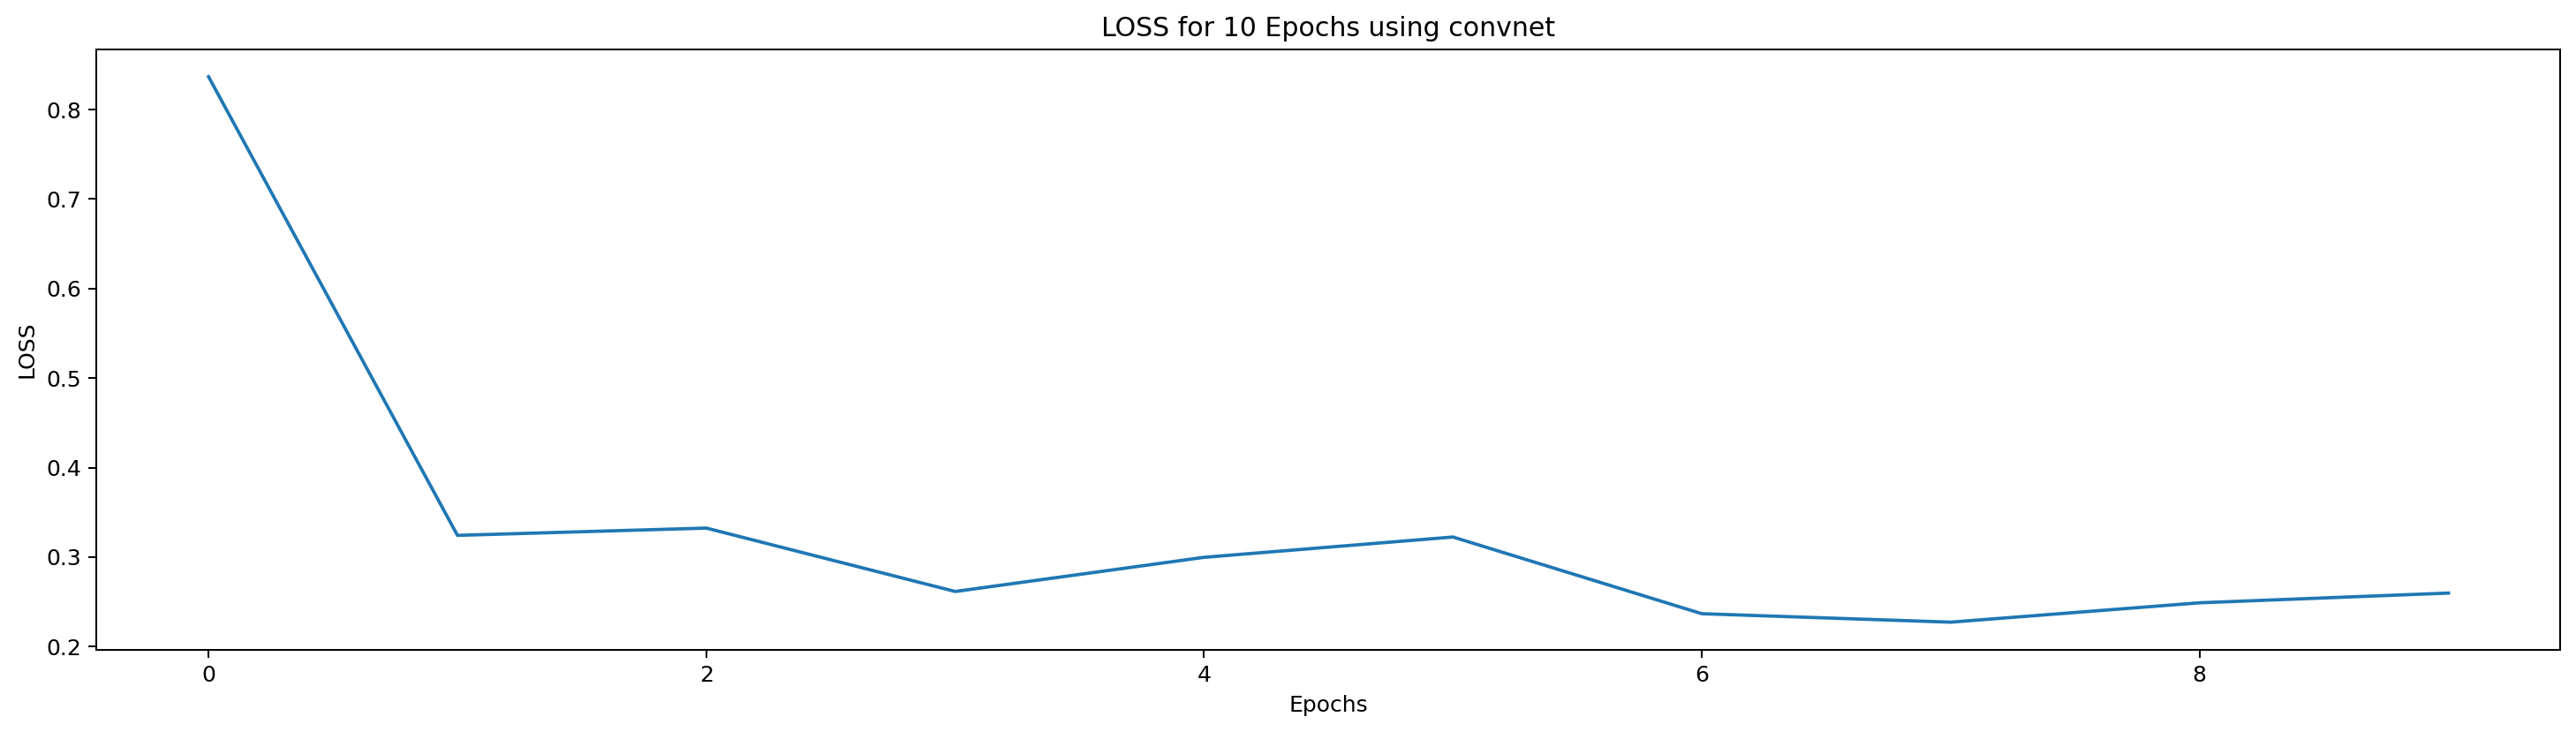

In [28]:
plot_metrics(model_conv)

In [ ]:
model.save_weights('covid_cough_model.h5') 